## Atom loading shim coil settings statistics
An investigation of how much we typically have to move the shim coils to see atom loading when it goes away, and how often we have to change the coils.

Todo: 
plot the coil values vs time, by getting the date and timestamp from the experiment files and converting them to datetime objects.

In [3]:
from matplotlib import pyplot as plt
import csv
import numpy as np
import os
import PIL # for reading tif images
import h5py
import datetime as dt
import time

results = "C:\\Networking Experiment\\artiq codes\\artiq-master\\results\\"
results_dir_chars = len(results)
ms = 1e-3

def eval_str_from_h5(h5_str):
    """a stupid way to evaluate python evaluable strings I saved as ARTIQ datasets"""
    return eval(str(np.array(h5_str))[2:-1])

## January 2024

### 2024.01.22

In [29]:
start_dir = results
date_filters = ["2024-01"]
name_filters = ["SamplerMOTCoilTune","SamplerCoilTuneFORTLoading","AtomLoadingOptimizerMLOOP"] # only find files containing all these strings

def condition(filename):
    condition1 = condition2 = False
    try:
        condition1 = np.bool_(h5py.File(filename)['datasets']['set_current_coil_volts_at_finish'])
    except KeyError:
        pass # not an error. not all of the experiments have this argument
    try:
        condition2 = np.bool_(h5py.File(filename)['datasets']['set_best_coil_volts_at_finish'])
    except KeyError:
        pass

    condition_met = condition1 or condition2
    return condition_met

file_list = []
for root, dirs, files in os.walk(start_dir,topdown=False):
    for name in files:
        if True in set([x in root for x in date_filters]) and True in set([x in name for x in name_filters]):
            filename = os.path.join(root, name)
            try:
                h5py.File(filename)
                if condition(filename):
                    # print(os.path.join(root, name))
                    file_list.append(filename)
            except OSError:
                pass # corrupt file
            except KeyError:
                print(filename)
print(f"found {len(file_list)} files")

found 23 files


In [17]:
file_list

['C:\\Networking Experiment\\artiq codes\\artiq-master\\results\\2024-01-03\\15\\000009049-SamplerCoilTuneFORTLoading.h5',
 'C:\\Networking Experiment\\artiq codes\\artiq-master\\results\\2024-01-04\\15\\000009151-SamplerCoilTuneFORTLoading.h5',
 'C:\\Networking Experiment\\artiq codes\\artiq-master\\results\\2024-01-04\\15\\000009160-SamplerCoilTuneFORTLoading.h5',
 'C:\\Networking Experiment\\artiq codes\\artiq-master\\results\\2024-01-04\\15\\000009161-SamplerCoilTuneFORTLoading.h5',
 'C:\\Networking Experiment\\artiq codes\\artiq-master\\results\\2024-01-04\\16\\000009178-SamplerCoilTuneFORTLoading.h5',
 'C:\\Networking Experiment\\artiq codes\\artiq-master\\results\\2024-01-04\\16\\000009179-SamplerCoilTuneFORTLoading.h5',
 'C:\\Networking Experiment\\artiq codes\\artiq-master\\results\\2024-01-10\\10\\000009207-SamplerMOTCoilTune.h5',
 'C:\\Networking Experiment\\artiq codes\\artiq-master\\results\\2024-01-10\\10\\000009209-SamplerMOTCoilTune.h5',
 'C:\\Networking Experiment\\art

In [23]:
file_list[0][len(results):len(results)+13]

'2024-01-03\\15'

In [23]:
file_list[0][len(results):len(results)+13]

'2024-01-03\\15'

In [ ]:
date_labels = []
    for file in file_list:
        if

In [14]:
V_coil_list = []
for filename in file_list:
    ds = h5py.File(filename)['archive']
    V_coil_list.append([np.float64(ds[lbl]) for lbl in ['AZ_bottom_volts_MOT','AZ_top_volts_MOT','AX_volts_MOT','AY_volts_MOT']])
AZ_bottom_arr, AZ_top_arr, AX_arr, AY_arr = np.array(V_coil_list).transpose()

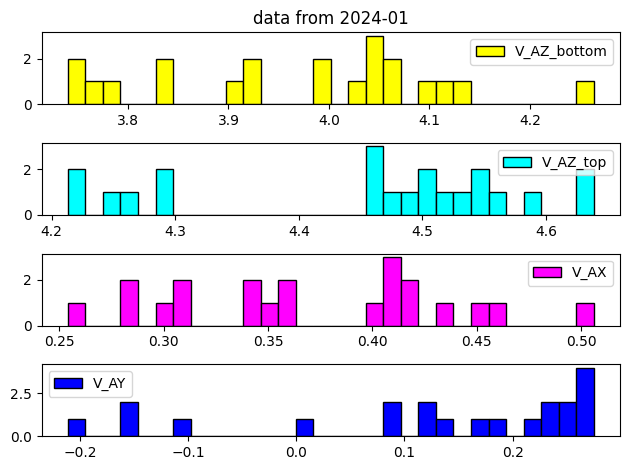

In [30]:
# plot the coil values as histograms
fig,axes = plt.subplots(nrows=4)
labels = ['V_AZ_bottom', 'V_AZ_top', 'V_AX', 'V_AY']
colors = ['yellow','cyan','magenta','blue']
for ax,V_arr,lbl,color in zip(axes, np.array(V_coil_list).transpose(), labels, colors):
    ax.hist(V_arr, facecolor=color, edgecolor=(0, 0, 0, 1), linestyle='-', label=lbl, bins=30)
    ax.legend()
dates = ",".join(date_filters)
axes[0].set_title(f"data from {dates}")
fig.tight_layout()

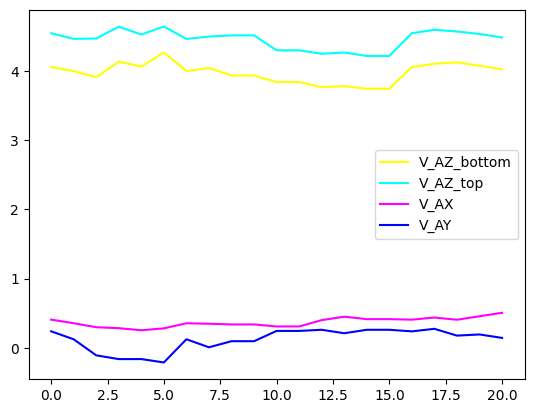

In [31]:
fig,ax = plt.subplots()
for V_arr,lbl,color in zip(np.array(V_coil_list).transpose(), labels, colors):
    ax.plot(V_arr,label=lbl,color=color)
ax.legend()

### 2024.01.08

In [ ]:
SamplerCoilTuneFORTLoading

In [18]:
"0_SamplerMOTCoilTune.h5"[-21:],"SamplerCoilTuneFORTLoading.h5"[-29:]

('SamplerMOTCoilTune.h5', 'SamplerCoilTuneFORTLoading.h5')

In [20]:
name = "000009151-SamplerCoilTuneFORTLoading.h5"
name[-29:] == "SamplerCoilTuneFORTLoading.h5"

True

In [31]:
os.path.join(root, name)

'C:\\Networking Experiment\\artiq codes\\artiq-master\\results\\2024-01-03\\000009069-SimpleAtomTrapNoChop.h5'

In [35]:
list(set([0,0]))[0]

0

In [ ]:
if list(set([x in name for x in name_filters]))[0]

In [60]:
name_filters = ["SamplerMOTCoilTune.h5","SamplerCoilTuneFORTLoading.h5"]
name = "000009037-SamplerCoilTuneFORTLoading.h5"
(True in set([x in name for x in name_filters]))

True

In [99]:
start_dir = results
date_filters = ["2023-12","2024-01"]
name_filters = ["SamplerMOTCoilTune.h5","SamplerCoilTuneFORTLoading.h5"] # only find files containing all these strings
condition = lambda filename: np.bool_(h5py.File(filename)['datasets']['set_current_coil_volts_at_finish']) # if this is checked, we must have gotten atom loading
file_list = []
for root, dirs, files in os.walk(start_dir,topdown=False):
    for name in files:
        if True in set([x in root for x in date_filters]) and True in set([x in name for x in name_filters]):
            filename = os.path.join(root, name)

            try:
                h5py.File(filename)
                if condition(filename):
                    # print(os.path.join(root, name))
                    file_list.append(filename)
            except OSError:
                pass # corrupt file                

In [100]:
file_list

['C:\\Networking Experiment\\artiq codes\\artiq-master\\results\\2023-12-01\\11\\000008033-SamplerMOTCoilTune.h5',
 'C:\\Networking Experiment\\artiq codes\\artiq-master\\results\\2023-12-01\\11\\000008037-SamplerMOTCoilTune.h5',
 'C:\\Networking Experiment\\artiq codes\\artiq-master\\results\\2023-12-01\\11\\000008039-SamplerMOTCoilTune.h5',
 'C:\\Networking Experiment\\artiq codes\\artiq-master\\results\\2023-12-01\\11\\000008042-SamplerMOTCoilTune.h5',
 'C:\\Networking Experiment\\artiq codes\\artiq-master\\results\\2023-12-01\\13\\000008070-SamplerMOTCoilTune.h5',
 'C:\\Networking Experiment\\artiq codes\\artiq-master\\results\\2023-12-01\\14\\000008087-SamplerMOTCoilTune.h5',
 'C:\\Networking Experiment\\artiq codes\\artiq-master\\results\\2023-12-01\\14\\000008091-SamplerMOTCoilTune.h5',
 'C:\\Networking Experiment\\artiq codes\\artiq-master\\results\\2023-12-01\\14\\000008093-SamplerMOTCoilTune.h5',
 'C:\\Networking Experiment\\artiq codes\\artiq-master\\results\\2023-12-01\\14\

In [101]:
V_coil_list = []
for filename in file_list:
    ds = h5py.File(filename)['archive']
    V_coil_list.append([np.float64(ds[lbl]) for lbl in ['AZ_bottom_volts_MOT','AZ_top_volts_MOT','AX_volts_MOT','AY_volts_MOT']])
AZ_bottom_arr, AZ_top_arr, AX_arr, AY_arr = np.array(V_coil_list).transpose()

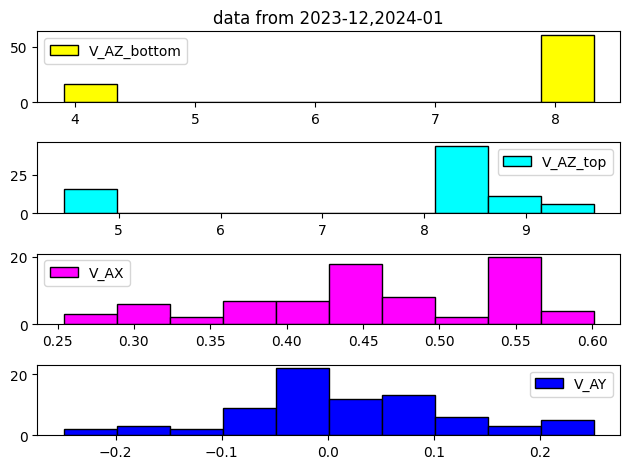

In [111]:
# plot the coil values as histograms
fig,axes = plt.subplots(nrows=4)
labels = ['V_AZ_bottom', 'V_AZ_top', 'V_AX', 'V_AY']
colors = ['yellow','cyan','magenta','blue']
for ax,V_arr,lbl,color in zip(axes, np.array(V_coil_list).transpose(), labels, colors):
    ax.hist(V_arr, facecolor=color, edgecolor=(0, 0, 0, 1), linestyle='-', label=lbl)
    ax.legend()
dates = ",".join(date_filters)
axes[0].set_title(f"data from {dates}")
fig.tight_layout()

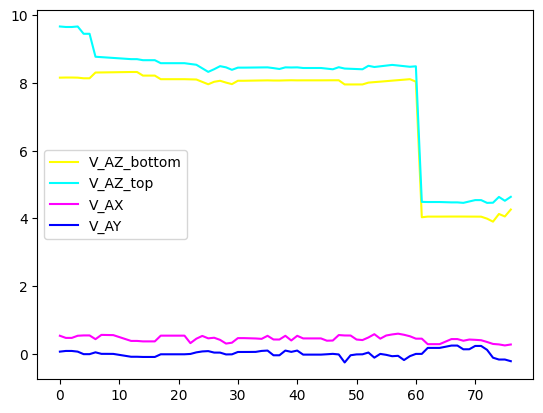

In [114]:
fig,ax = plt.subplots()
for V_arr,lbl,color in zip(np.array(V_coil_list).transpose(), labels, colors):
    ax.plot(V_arr,label=lbl,color=color)
ax.legend()

## testing

In [27]:
start_dir = os.path.join(results, "2024-01-03")
for root, dirs, files in os.walk(start_dir,topdown=False):
    for name in files:
        if name[-21:] == "SamplerMOTCoilTune.h5" or name[-29:] == "SamplerCoilTuneFORTLoading.h5":
            print(os.path.join(root, name))
            print(dirs)

C:\Networking Experiment\artiq codes\artiq-master\results\2024-01-03\14\000009037-SamplerCoilTuneFORTLoading.h5
[]
C:\Networking Experiment\artiq codes\artiq-master\results\2024-01-03\14\000009038-SamplerCoilTuneFORTLoading.h5
[]
C:\Networking Experiment\artiq codes\artiq-master\results\2024-01-03\15\000009039-SamplerCoilTuneFORTLoading.h5
[]
C:\Networking Experiment\artiq codes\artiq-master\results\2024-01-03\15\000009040-SamplerCoilTuneFORTLoading.h5
[]
C:\Networking Experiment\artiq codes\artiq-master\results\2024-01-03\15\000009041-SamplerCoilTuneFORTLoading.h5
[]
C:\Networking Experiment\artiq codes\artiq-master\results\2024-01-03\15\000009042-SamplerCoilTuneFORTLoading.h5
[]
C:\Networking Experiment\artiq codes\artiq-master\results\2024-01-03\15\000009043-SamplerCoilTuneFORTLoading.h5
[]
C:\Networking Experiment\artiq codes\artiq-master\results\2024-01-03\15\000009044-SamplerCoilTuneFORTLoading.h5
[]
C:\Networking Experiment\artiq codes\artiq-master\results\2024-01-03\15\00000904

In [76]:
f = h5py.File(os.path.join(results, "2023-12-24\\14\\000008985-SingleAtomTrapLifetime.h5"))
[x for x in f['datasets']]

['AOM_A1_power',
 'AOM_A2_power',
 'AOM_A3_power',
 'AOM_A4_power',
 'AOM_A5_power',
 'AOM_A6_power',
 'FORT_monitor',
 'MOT1_monitor',
 'MOT2_monitor',
 'MOT3_monitor',
 'MOT4_monitor',
 'MOT5_monitor',
 'MOT6_monitor',
 'MOT_AOMs_always_on',
 'MOT_switchyard_monitor',
 'bins',
 'iteration',
 'n_measurements',
 'p_cooling_DP_MOT',
 'photocount_bins',
 'photocounts',
 'photocounts2',
 'photocounts2_current_iteration',
 'photocounts_current_iteration',
 'scan_datasets',
 't_delay_between_shots_sequence']

In [72]:
[x for x in f['archive']]

['AOM_A1_freq',
 'AOM_A1_power',
 'AOM_A2_freq',
 'AOM_A2_power',
 'AOM_A3_freq',
 'AOM_A3_power',
 'AOM_A4_freq',
 'AOM_A4_power',
 'AOM_A5_freq',
 'AOM_A5_power',
 'AOM_A6_freq',
 'AOM_A6_power',
 'AX_volts_MOT',
 'AX_volts_OP',
 'AX_volts_PGC',
 'AX_volts_RO',
 'AY_volts_MOT',
 'AY_volts_OP',
 'AY_volts_PGC',
 'AY_volts_RO',
 'AZ_bottom_volts_MOT',
 'AZ_bottom_volts_OP',
 'AZ_bottom_volts_PGC',
 'AZ_bottom_volts_RO',
 'AZ_top_volts_MOT',
 'AZ_top_volts_OP',
 'AZ_top_volts_PGC',
 'AZ_top_volts_RO',
 'Luca_trigger_for_feedback_verification',
 'MOT5_fW_Thor_monitor',
 'MOT5_fW_monitor',
 'MOT_beam_monitor_points',
 'Vx_array',
 'Vy_array',
 'Vz_bottom_array',
 'Vz_top_array',
 '[-1.5 - i*(3.3 - 1.5)',
 '[0.025 - k*(0.9 + 0.025)',
 '[0.15 - j*(0.8 + 0.15)',
 '[0.6 - l*(0.6 - 1)',
 'aom_feedback_averages',
 'aom_feedback_iterations',
 'blowaway_light_off',
 'cooling_setpoint_mW',
 'cooling_volts_ch',
 'do_PGC_in_MOT',
 'enable_laser_feedback',
 'fW_Thor_monitor',
 'f_D1_pumping_SP',
 'f_

In [80]:
np.float64(f['archive']['AX_volts_MOT'])

0.407400634765625

In [7]:
n_measurements = np.uint(f['datasets']['n_measurements'])
counts_shot1 = np.array(f['datasets']['photocounts'])[1:]
counts_shot2 = np.array(f['datasets']['photocounts2'])[1:]
t_delay_arr = eval_str_from_h5(f['datasets']['t_delay_between_shots_sequence'])

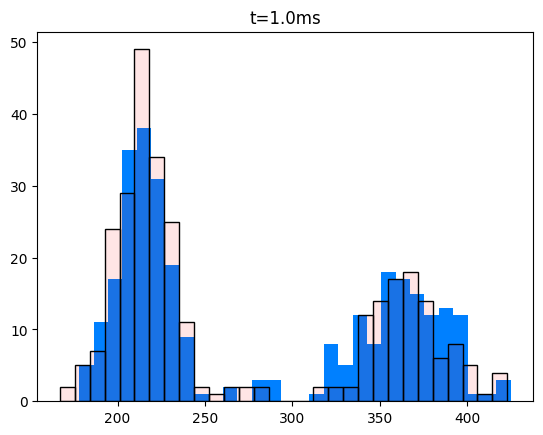

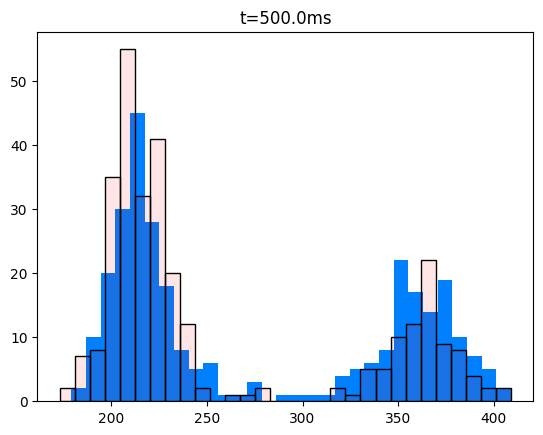

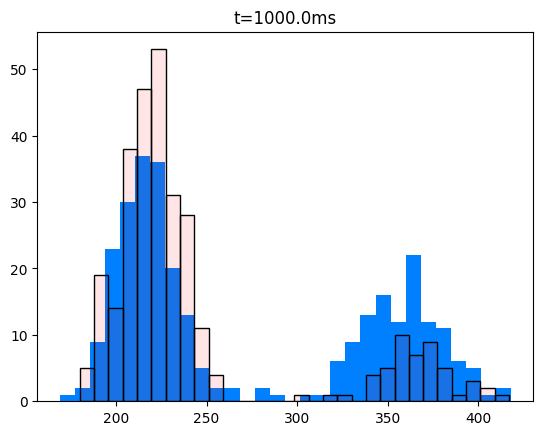

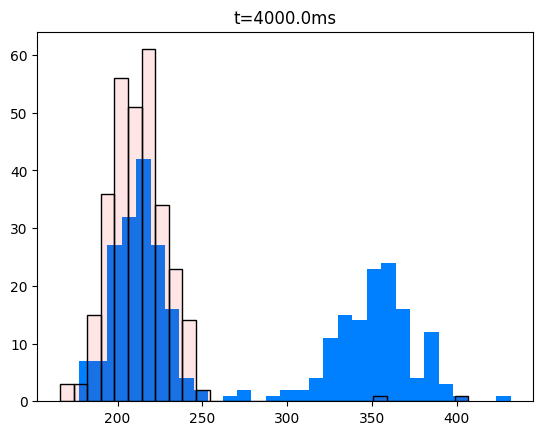

In [12]:
# plot histogram for each iteration (iteration = experiment sequence with a particular gap time between shots)
cutoff = 300
retention_array = np.zeros(len(t_delay_arr))
loading_rate_array = np.zeros(len(t_delay_arr))
n_atoms_loaded_array = np.zeros(len(t_delay_arr))

for i,t in enumerate(t_delay_arr):
    shot1 = counts_shot1[i*n_measurements:(i+1)*n_measurements]
    shot2 = counts_shot2[i*n_measurements:(i+1)*n_measurements]
    plt.hist(shot1,bins=30, facecolor=(0.0, 0.5, 1, 1),label='shot 1')
    plt.hist(shot2,bins=30, facecolor=(1.0, 0.0, 0.0, 0.1),label='shot 2', edgecolor=(0, 0, 0, 1), linestyle='-')
    plt.title(f"t={t/ms}ms")
    plt.show()
    atoms_loaded = [x > cutoff for x in shot1]
    n_atoms_loaded = sum(atoms_loaded)
    atoms_retained = [x > cutoff and y for x,y in zip(shot2, atoms_loaded)]
    retention_fraction = 0 if not n_atoms_loaded > 0 else sum(atoms_retained)/sum(atoms_loaded)
    retention_array[i] = retention_fraction
    loading_rate_array[i] = n_atoms_loaded/n_measurements
    n_atoms_loaded_array[i] = n_atoms_loaded

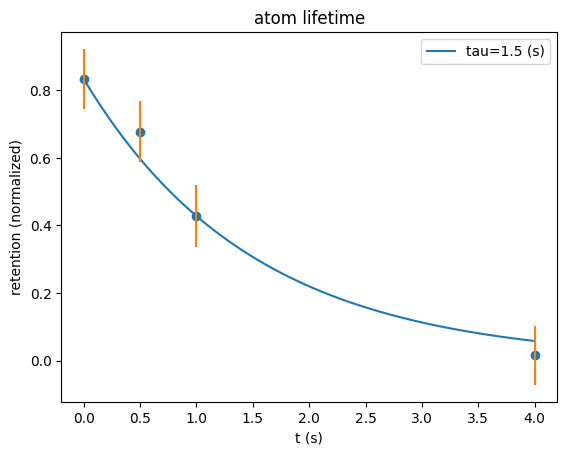

In [13]:
plt.scatter(t_delay_arr, retention_array)
t_pts = np.linspace(t_delay_arr[0],t_delay_arr[-1],100)
tau = 1.5
plt.title('atom lifetime')
plt.plot(t_pts,retention_array[0]*np.exp(-t_pts/tau),label=f"tau={tau} (s)")
plt.errorbar(t_delay_arr,retention_array,1/np.sqrt(n_atoms_loaded_array),ls='none')
plt.ylabel("retention (normalized)")
plt.xlabel("t (s)")
# plt.xlim((0,1.1))
plt.legend()